# Text extraction on image
Inga Ulusoy, SSC, July 2022

In [1]:
# if running on google colab
# flake8-noqa-cell
import os

if "google.colab" in str(get_ipython()):
    # update python version
    # install setuptools
    !pip install setuptools==61 -qqq
    # install misinformation
    !pip install git+https://github.com/ssciwr/misinformation.git -qqq
    # mount google drive for data and API key
    from google.colab import drive

    drive.mount("/content/drive")

In [2]:
import os
from IPython.display import Image, display
import misinformation
from misinformation import utils as mutils
from misinformation import display as mdisplay
import tensorflow as tf

In [3]:
# download the models if they are not there yet
!python -m spacy download en_core_web_md
!python -m textblob.download_corpora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/42.8 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/42.8 MB 3.3 MB/s eta 0:00:14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/42.8 MB 7.0 MB/s eta 0:00:07

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/42.8 MB 11.9 MB/s eta 0:00:04

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/42.8 MB 14.9 MB/s eta 0:00:03

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/42.8 MB 19.1 MB/s eta 0:00:02

     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/42.8 MB 23.9 MB/s eta 0:00:02

     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/42.8 MB 54.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/42.8 MB 84.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 20.2/42.8 MB 102.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 28.2/42.8 MB 109.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 31.6/42.8 MB 104.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 38.5/42.8 MB 96.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 42.1/42.8 MB 99.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 57.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 57.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 57.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 57.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 26.8 MB/s eta 0:00:00


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package brown to /home/runner/nltk_data...


[nltk_data]   Unzipping corpora/brown.zip.


[nltk_data] Downloading package punkt to /home/runner/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package wordnet to /home/runner/nltk_data...


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/runner/nltk_data...


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[nltk_data] Downloading package conll2000 to /home/runner/nltk_data...


[nltk_data]   Unzipping corpora/conll2000.zip.


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/runner/nltk_data...


[nltk_data]   Unzipping corpora/movie_reviews.zip.


Finished.


In [4]:
images = mutils.find_files(path="data", limit=10)

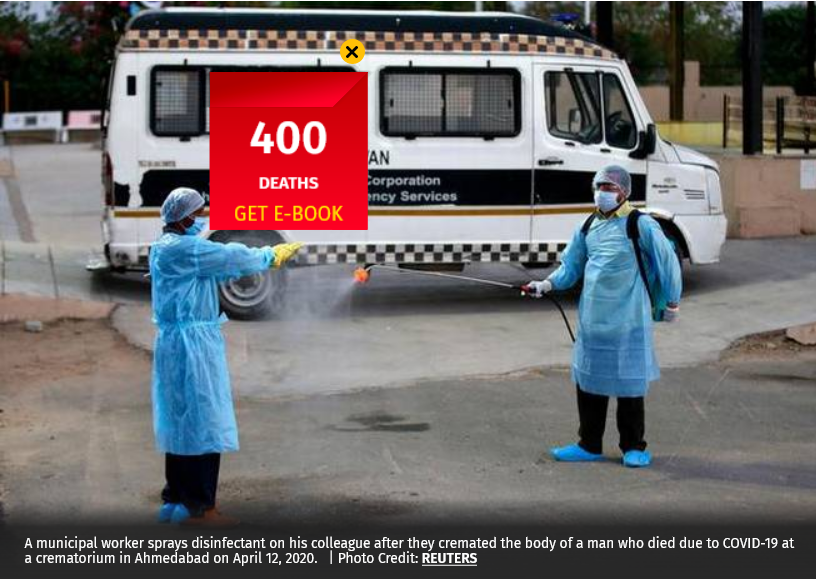

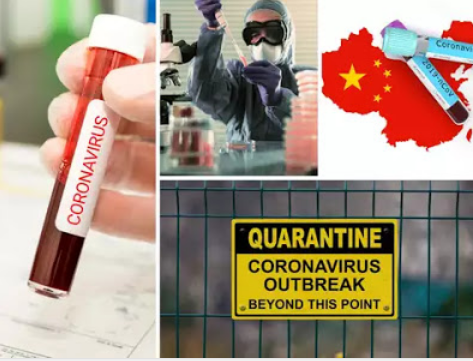

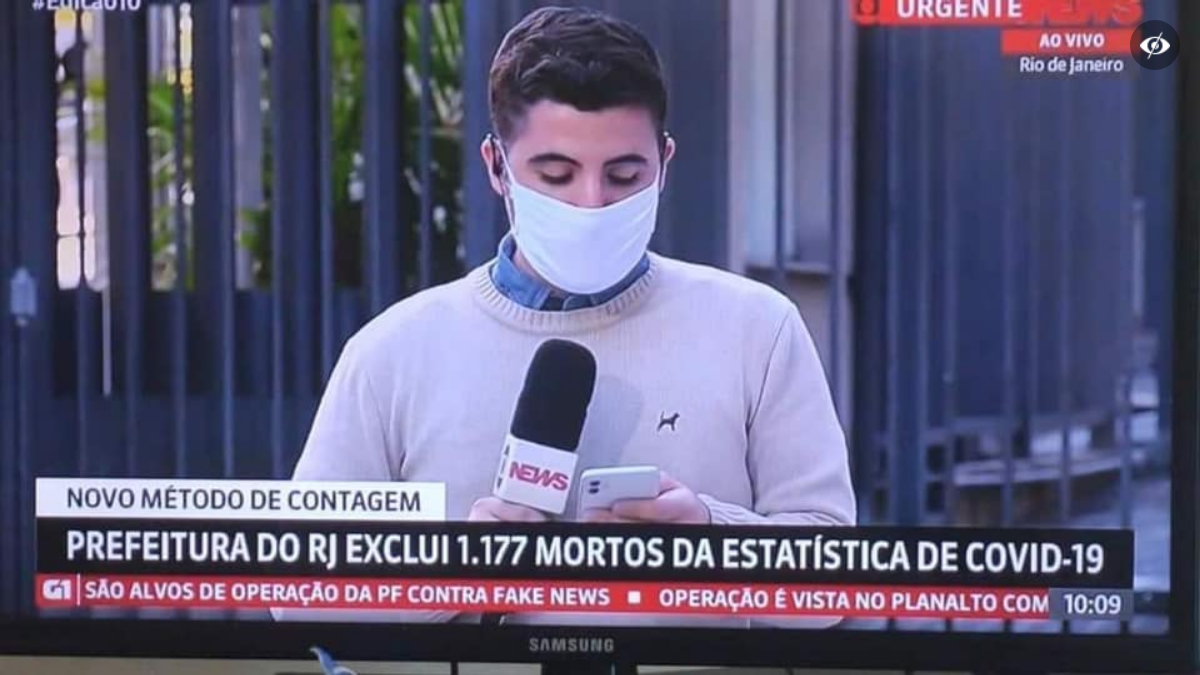

In [5]:
for i in images:
    display(Image(filename=i))

In [6]:
mydict = mutils.initialize_dict(images)

## google cloud vision API
First 1000 images per month are free.

## Inspect the elements per image

In [7]:
mdisplay.explore_analysis(mydict, identify="text-on-image")

## Or directly analyze for further processing

In [8]:
for key in mydict:
    print(key)
    mydict[key] = misinformation.text.TextDetector(
        mydict[key], analyse_text=True
    ).analyse_image()

102730_eng


102141_2_eng


106349S_por


## Convert to dataframe and write csv

In [9]:
outdict = mutils.append_data_to_dict(mydict)
df = mutils.dump_df(outdict)

In [10]:
# check the dataframe
df.head(10)

,filename,text,text_language,text_english,text_clean,text_english_correct,polarity,subjectivity
0,data/102730_eng.png,400 DEATHS GET E-BOOK X AN Corporation ncy Ser...,en,400 DEATHS GET E-BOOK X AN Corporation ncy Ser...,DEATHS GET E - BOOK X AN Corporation Services ...,400 DEATHS GET E-BOOK X of Corporation ney Ser...,-0.125000,0.375000
1,data/102141_2_eng.png,CORONAVIRUS QUARANTINE CORONAVIRUS OUTBREAK BE...,en,CORONAVIRUS QUARANTINE CORONAVIRUS OUTBREAK BE...,CORONAVIRUS QUARANTINE CORONAVIRUS OUTBREAK BE...,CORONAVIRUS QUARANTINE CORONAVIRUS OUTBREAK BE...,0.000000,0.000000
2,data/106349S_por.png,NEWS URGENTE SAMSUNG AO VIVO Rio de Janeiro NO...,pt,NEWS URGENT SAMSUNG LIVE Rio de Janeiro NEW CO...,NEWS URGENT SAMSUNG LIVE Rio de Janeiro NEW CO...,NEWS URGENT SAMSUNG LIVE Rio de Janeiro NEW CO...,-0.106818,0.588636


In [11]:
# Write the csv
df.to_csv("./data_out.csv")